In [60]:
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
import pandas as pd
from utils.preprocess import treat_dataset_pandas_init, build_preprocessing_pipeline,INIT_NUMERICAL_COLS, numerical_features

In [62]:
train_data = pd.read_csv("playground-series-s4e12/train.csv")
test_data = pd.read_csv("playground-series-s4e12/test.csv")

treated_dataset = treat_dataset_pandas_init(train_data, process_as_category=True)

X_train = treated_dataset.drop(columns=["Premium Amount"])
y_train = treated_dataset["Premium Amount"]


KeyboardInterrupt: 

In [28]:
treated_dataset = treat_dataset_pandas_init(train_data, process_as_category=True)

X_train = treated_dataset.drop(columns=["Premium Amount"])
y_train = treated_dataset["Premium Amount"]


In [29]:
from utils.metrics import rmsle_metric

In [30]:

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

from xgboost import XGBRegressor
from sklearn.model_selection import ShuffleSplit
import numpy as np
import xgboost as xgb

In [31]:
X_train = treated_dataset.drop(columns=["Premium Amount"])
y_train = treated_dataset["Premium Amount"]


In [32]:
from sklearn.metrics import root_mean_squared_log_error

In [36]:

# Define a 60-40 split
splitter = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)


In [23]:

results = []
for train_idx, val_idx in splitter.split(X_train):
    print("Starting")
    # Prepare data for LightGBM
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    y_train_fold = np.log1p(y_train_fold)
    y_val_fold = np.log1p(y_val_fold)
    
    full_pipeline = Pipeline([
        ("model",xgb.XGBRegressor(enable_categorical=True, eta=0.1, colsample_bytree=0.75, n_estimators=500))
    ])
    full_pipeline.fit(X_train_fold, y_train_fold)
    
    train_score = root_mean_squared_log_error(np.expm1(full_pipeline.predict(X_train_fold)), np.expm1(y_train_fold))
    val_score = root_mean_squared_log_error(np.expm1(full_pipeline.predict(X_val_fold)), np.expm1(y_val_fold))

    print(f"Train: {train_score}, Test: {val_score}")

Starting
Train: 1.027314439582407, Test: 1.0450354074703103
Starting
Train: 1.0265366840262757, Test: 1.046808471461684
Starting
Train: 1.026993608076649, Test: 1.0456117737889523
Starting
Train: 1.0266691228607985, Test: 1.0467723962375388
Starting
Train: 1.0271327319321015, Test: 1.0443970924766364


In [34]:

# Define a 60-40 split
splitter = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)

results = []
for train_idx, val_idx in splitter.split(X_train):
    print("Starting")
    # Prepare data for LightGBM
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    full_pipeline = Pipeline([
        ("model",xgb.XGBRegressor(enable_categorical=True, eta=0.1, colsample_bytree=0.75, n_estimators=500, objective="reg:squaredlogerror"))
    ])
    full_pipeline.fit(X_train_fold, y_train_fold)
    
    train_score = root_mean_squared_log_error(full_pipeline.predict(X_train_fold), y_train_fold)
    val_score = root_mean_squared_log_error(full_pipeline.predict(X_val_fold), y_val_fold)

    print(f"Train: {train_score}, Test: {val_score}")

Starting
Train: 1.0761007021347004, Test: 1.0744492189644737
Starting
Train: 1.0754853032749465, Test: 1.075146013746591
Starting
Train: 1.0758758141000668, Test: 1.0750653723470374
Starting
Train: 1.075734950572056, Test: 1.0764328248978576
Starting
Train: 1.0763650817923707, Test: 1.0728733423710008


In [35]:
from lightgbm import LGBMRegressor


In [57]:
results = []
for train_idx, val_idx in splitter.split(X_train):
    print("Starting")
    # Prepare data for LightGBM
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    y_train_fold = np.log1p(y_train_fold)
    y_val_fold = np.log1p(y_val_fold)
    
    null_columns_to_drop = [col for col in X_train_fold.columns if "null" in col.lower()]
    X_train_fold = X_train_fold.drop(columns=null_columns_to_drop)
    X_val_fold = X_val_fold.drop(columns=null_columns_to_drop)
    
    full_pipeline = Pipeline([
        ("model",LGBMRegressor(enable_categorical=True, learning_rate=0.1, colsample_bytree=0.9, n_estimators=500, device='gpu'))
    ])
    full_pipeline.fit(X_train_fold, y_train_fold)
    
    train_score = root_mean_squared_log_error(np.expm1(full_pipeline.predict(X_train_fold)), np.expm1(y_train_fold))
    val_score = root_mean_squared_log_error(np.expm1(full_pipeline.predict(X_val_fold)), np.expm1(y_val_fold))

    print(f"Train: {train_score}, Test: {val_score}")

Starting
Train: 1.0325278610677524, Test: 1.0447705097880993
Starting
Train: 1.031588658392681, Test: 1.0463711381373801
Starting
Train: 1.0319794720317341, Test: 1.0456132592707925
Starting
Train: 1.0318834667296615, Test: 1.046167104440835
Starting
Train: 1.0325479942320952, Test: 1.0439749179377067


In [58]:

results = []
for train_idx, val_idx in splitter.split(X_train):
    print("Starting")
    # Prepare data for LightGBM
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    y_train_fold = np.log1p(y_train_fold)
    y_val_fold = np.log1p(y_val_fold)
    
    
    full_pipeline = Pipeline([
        ("model",LGBMRegressor(enable_categorical=True, learning_rate=0.1, colsample_bytree=0.9, n_estimators=500, device='gpu'))
    ])
    full_pipeline.fit(X_train_fold, y_train_fold)
    
    train_score = root_mean_squared_log_error(np.expm1(full_pipeline.predict(X_train_fold)), np.expm1(y_train_fold))
    val_score = root_mean_squared_log_error(np.expm1(full_pipeline.predict(X_val_fold)), np.expm1(y_val_fold))

    print(f"Train: {train_score}, Test: {val_score}")

Starting
Train: 1.032141185176344, Test: 1.0441128962727946
Starting
Train: 1.0314373547547373, Test: 1.0458194982478308
Starting
Train: 1.031817791766439, Test: 1.044954298168544
Starting
Train: 1.0314014343268854, Test: 1.045542363974723
Starting
Train: 1.0322409278543372, Test: 1.0436113260947164


In [63]:

results = []
for train_idx, val_idx in splitter.split(X_train):
    print("Starting")
    # Prepare data for LightGBM
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    y_train_fold = np.log1p(y_train_fold)
    y_val_fold = np.log1p(y_val_fold)
    
    preprocessing_pipeline = build_preprocessing_pipeline(train_data=X_train_fold, imputation_method="simple", binning_method="opti-means")
    
    full_pipeline = Pipeline([
        ("preprocessing", preprocessing_pipeline),
        ("model",LGBMRegressor(enable_categorical=True, learning_rate=0.1, colsample_bytree=0.9, n_estimators=500, device='gpu'))
    ])
    full_pipeline.fit(X_train_fold, y_train_fold)
    
    train_score = root_mean_squared_log_error(np.expm1(full_pipeline.predict(X_train_fold)), np.expm1(y_train_fold))
    val_score = root_mean_squared_log_error(np.expm1(full_pipeline.predict(X_val_fold)), np.expm1(y_val_fold))

    print(f"Train: {train_score}, Test: {val_score}")

Starting
Fitting and caching preprocessor
Train: 1.048910258716075, Test: 1.0573189055185195
Starting
Fitting and caching preprocessor
Train: 1.0475316974671656, Test: 1.057645122828006
Starting
Fitting and caching preprocessor
Train: 1.0473273642609564, Test: 1.0565820117322846
Starting
Fitting and caching preprocessor
Train: 1.0471584533902853, Test: 1.0580273418910218
Starting
Fitting and caching preprocessor
Train: 1.0480312367681839, Test: 1.0557269000107363


In [46]:

results = []
for train_idx, val_idx in splitter.split(X_train):
    print("Starting")
    # Prepare data for LightGBM
    X_train_fold, X_val_fold = X_train.iloc[train_idx].reset_index(drop=True), X_train.iloc[val_idx].reset_index(drop=True)
    y_train_fold, y_val_fold = y_train.iloc[train_idx].reset_index(drop=True), y_train.iloc[val_idx].reset_index(drop=True)
    
    y_train_fold = np.log1p(y_train_fold)
    y_val_fold = np.log1p(y_val_fold)
    
    preprocessing_pipeline = build_preprocessing_pipeline(train_data=X_train_fold, imputation_method="mice", binning_method=None)
    
    full_pipeline = Pipeline([
        ("preprocessing", preprocessing_pipeline),
        ("model",LGBMRegressor(enable_categorical=True, learning_rate=0.1, colsample_bytree=0.9, n_estimators=500))
    ])
    full_pipeline.fit(X_train_fold, y_train_fold, preprocessing__mice__iterations=3)
    
    train_score = root_mean_squared_log_error(np.expm1(full_pipeline.predict(X_train_fold)), np.expm1(y_train_fold))
    val_score = root_mean_squared_log_error(np.expm1(full_pipeline.predict(X_val_fold)), np.expm1(y_val_fold))

    print(f"Train: {train_score}, Test: {val_score}")

Starting
Fitting and caching preprocessor
Train: 1.0369478956815978, Test: 1.044812723038474
Starting
Fitting and caching preprocessor
Train: 1.0365319628705394, Test: 1.0464351434373507
Starting
Fitting and caching preprocessor
Train: 1.0362361877761606, Test: 1.045214605738254
Starting
Fitting and caching preprocessor
Train: 1.0363363713459766, Test: 1.0465101000292005
Starting
Fitting and caching preprocessor
Train: 1.0370389341913067, Test: 1.0443446890099688


In [ ]:

results = []
for train_idx, val_idx in splitter.split(X_train):
    print("Starting")
    # Prepare data for LightGBM
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Train model
    preprocessing_pipeline = build_preprocessing_pipeline(train_data=X_train_fold, imputation_method="simple", binning_method=None)

    full_pipeline = Pipeline([
        #("preprocessing", preprocessing_pipeline),
        ("model",xgb.XGBRegressor(enable_categorical=True, eta=0.5, colsample_bytree=0.75, n_estimators=500))
    ])
    full_pipeline.fit(X_train_fold, y_train_fold)
    
    train_score = root_mean_squared_log_error(full_pipeline.predict(X_train_fold), y_train_fold)
    val_score = root_mean_squared_log_error(full_pipeline.predict(X_val_fold), y_val_fold)

    print(f"Train: {train_score}, Test: {val_score}")

In [13]:

results = []
for train_idx, val_idx in splitter.split(X_train):
    print("Starting")
    # Prepare data for LightGBM
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Train model
    preprocessing_pipeline = build_preprocessing_pipeline(train_data=X_train_fold, imputation_method="simple", binning_method=None)

    full_pipeline = Pipeline([
        #("preprocessing", preprocessing_pipeline),
        ("model",xgb.XGBRFRegressor(enable_categorical=True, eta=0.1, colsample_bytree=0.75, n_estimators=500))
    ])
    full_pipeline.fit(X_train_fold, y_train_fold)
    
    train_score = rmsle_metric(full_pipeline.predict(X_train_fold), y_train_fold)
    val_score = rmsle_metric(full_pipeline.predict(X_val_fold), y_val_fold)

    print(f"Train: {train_score}, Test: {val_score}")

Starting
Train: ('rmsle', 1.0521373152402227, False), Test: ('rmsle', 1.0502580803569446, False)
Starting
Train: ('rmsle', 1.052397095980636, False), Test: ('rmsle', 1.052684515975214, False)
Starting
Train: ('rmsle', 1.0521611794085386, False), Test: ('rmsle', 1.0507623230705292, False)
Starting
Train: ('rmsle', 1.0521184392850993, False), Test: ('rmsle', 1.0525351946486103, False)
Starting
Train: ('rmsle', 1.0528637102042155, False), Test: ('rmsle', 1.0497331934492016, False)


In [14]:
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
# Define a 60-40 split
splitter = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)

results = []
for train_idx, val_idx in splitter.split(X_train):
    print("Starting KNN")
    # Prepare data for KNN
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Train model
    preprocessing_pipeline = build_preprocessing_pipeline(train_data=X_train_fold, imputation_method="simple", binning_method="opti-ohe")

    full_pipeline = Pipeline([
        ("preprocessing", preprocessing_pipeline),
        ("model", KNeighborsRegressor(n_neighbors=5))
    ])
    full_pipeline.fit(X_train_fold, y_train_fold)
    
    train_score = rmsle_metric(full_pipeline.predict(X_train_fold), y_train_fold)
    val_score = rmsle_metric(full_pipeline.predict(X_val_fold), y_val_fold)

    print(f"Train: {train_score}, Test: {val_score}")


Starting KNN
Fitting and caching preprocessor


In [ ]:

# Define a 60-40 split
splitter = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)

results = []
for train_idx, val_idx in splitter.split(X_train):
    print("Starting")
    # Prepare data for LightGBM
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Train model
    preprocessing_pipeline = build_preprocessing_pipeline(train_data=X_train_fold, imputation_method="simple", binning_method=None)

    full_pipeline = Pipeline([
        #("preprocessing", preprocessing_pipeline),
        ("model",xgb.XGBRFRegressor(enable_categorical=True, eta=0.1, colsample_bytree=0.75, n_estimators=500))
    ])
    full_pipeline.fit(X_train_fold, y_train_fold)
    
    train_score = rmsle_metric(full_pipeline.predict(X_train_fold), y_train_fold)
    val_score = rmsle_metric(full_pipeline.predict(X_val_fold), y_val_fold)

    print(f"Train: {train_score}, Test: {val_score}")

In [65]:
from sklearn.ensemble import StackingRegressor, HistGradientBoostingRegressor

In [67]:
results = []
for train_idx, val_idx in splitter.split(X_train):
    print("Starting")
    # Prepare data for LightGBM
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    y_train_fold = np.log1p(y_train_fold)
    y_val_fold = np.log1p(y_val_fold)

    linear_model_pipeline = Pipeline([
        ("preprocessing", build_preprocessing_pipeline(train_data=X_train_fold, imputation_method="simple", binning_method="opti-means", categorical_to_string=True)),
        ("model", LinearRegression())
    ])
    
    hist_pipeline = Pipeline([
        ("preprocessing", build_preprocessing_pipeline(train_data=X_train_fold, imputation_method="simple", categorical_to_string=True)),
        ("model", HistGradientBoostingRegressor())
    ])
    
    xgboost = xgb.XGBRegressor(enable_categorical=True, eta=0.1, colsample_bytree=0.9, n_estimators=500, device="cuda", tree_method="hist")
    xgboost_rf = xgb.XGBRFRegressor(enable_categorical=True, eta=0.1, colsample_bytree=0.9, n_estimators=500, device="cuda", tree_method="hist")
    lgbm = LGBMRegressor(learning_rate=0.1, colsample_bytree=0.9, n_estimators=500)

    stack_model = StackingRegressor(
        estimators=[
            ("linear_model", linear_model_pipeline),
            ("xgboost", xgboost),
            ("xgboost_rf", xgboost_rf),
            ("lgbm", lgbm),
            ("hist", hist_pipeline)
        ],
        final_estimator=xgb.XGBRegressor(enable_categorical=True, eta=0.01, colsample_bytree=0.9, n_estimators=500, device="cuda", tree_method="hist"),
        n_jobs=-1
    )

    stack_model.fit(X_train_fold, y_train_fold)

    train_score = root_mean_squared_log_error(np.expm1(stack_model.predict(X_train_fold)), np.expm1(y_train_fold))
    val_score = root_mean_squared_log_error(np.expm1(stack_model.predict(X_val_fold)), np.expm1(y_val_fold))

    print(f"Train: {train_score}, Test: {val_score}")

Starting
Train: 1.0361020301968693, Test: 1.0433636264186763
Starting
Train: 1.0346752715493195, Test: 1.0451123908307876
Starting
Train: 1.0347818317941586, Test: 1.0439422045073534
Starting
Train: 1.0354504846295776, Test: 1.0449189173310192
Starting
Train: 1.0355204576352393, Test: 1.0426576431740282


In [15]:
full_pipeline.fit(treated_dataset, treated_dataset['Premium Amount'])


Using cached preprocessor


Pipeline(steps=[('preprocessing',
                 CachedPreprocessor(cache={'2ef144eb4dd9820d23cbd1f947a28dd04389d6b6d307f8dcd7e8f1a831f3b991': Pipeline(steps=[('preprocessor',
                                                                                                                                ColumnTransformer(transformers=[('onehot',
                                                                                                                                                                 Pipeline(steps=[('ohe_imputer',
                                                                                                                                                                                  SimpleImputer(strategy='most_frequent')),
                                                                                                                                                                                 ('ohe',
                                                                                                                                                                                  OneHotEncoder(drop='first',
                                                                                                                                                                                                handle_unknown='ignore',
                                                                                                                                                                                                sparse_output=False)...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [16]:
res = full_pipeline.predict(treated_dataset)


In [17]:
from utils.metrics import rmsle_metric, source_range_root_mean_squared_log_error

In [18]:
source_range_root_mean_squared_log_error(treated_dataset['Premium Amount'], res)


0.2456514499603087

<Axes: >

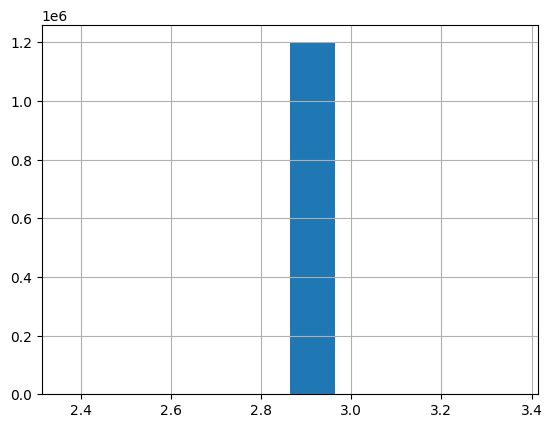

In [26]:
pd.Series(res).hist()

In [7]:
import miceforest as mf

In [5]:
kernel = mf.ImputationKernel(treated_dataset, num_datasets=1, random_state=1)


,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,...,Claim Frequency_null,Policy Start Year_null,Policy Start Month_null,Policy Start Day_null,Policy Start Hour_null,Policy Start Minute_null,Policy Start Second_null,Null columns_null,Annual Income log 10_null,Previous Claims log_null
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,...,False,False,False,False,False,False,False,False,False,False
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,...,False,False,False,False,False,False,False,False,False,False
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,...,False,False,False,False,False,False,False,False,False,False
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,...,False,False,False,False,False,False,False,False,False,False
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36.0,Female,27316.0,Married,0.0,Master's,Unemployed,13.772907,Urban,Premium,...,True,False,False,False,False,False,False,False,False,True
1199996,54.0,Male,35786.0,Divorced,NaN,Master's,Self-Employed,11.483482,Rural,Comprehensive,...,True,False,False,False,False,False,False,False,False,True
1199997,19.0,Male,51884.0,Divorced,0.0,Master's,NaN,14.724469,Suburban,Basic,...,False,False,False,False,False,False,False,False,False,False
1199998,55.0,Male,NaN,Single,1.0,PhD,NaN,18.547381,Suburban,Premium,...,False,False,False,False,False,False,False,False,True,False


In [46]:
from optbinning import ContinuousOptimalBinning


In [108]:
ContinuousOptimalBinning?

Init signature:
ContinuousOptimalBinning(
    name='',
    dtype='numerical',
    prebinning_method='cart',
    max_n_prebins=20,
    min_prebin_size=0.05,
    min_n_bins=None,
    max_n_bins=None,
    min_bin_size=None,
    max_bin_size=None,
    monotonic_trend='auto',
    min_mean_diff=0,
    max_pvalue=None,
    max_pvalue_policy='consecutive',
    gamma=0,
    outlier_detector=None,
    outlier_params=None,
    cat_cutoff=None,
    cat_unknown=None,
    user_splits=None,
    user_splits_fixed=None,
    special_codes=None,
    split_digits=None,
    time_limit=100,
    verbose=False,
    **prebinning_kwargs,
)
Docstring:     
Optimal binning of a numerical or categorical variable with respect to a
continuous target.

Parameters
----------
name : str, optional (default="")
    The variable name.

dtype : str, optional (default="numerical")
    The variable data type. Supported data types are "numerical" for
    continuous and ordinal variables and "categorical" for categorical
    a

In [58]:
binning = ContinuousOptimalBinning(name="Premium Amount", dtype="numerical")
binning.fit(treated_dataset["Credit Score"], treated_dataset["Premium Amount"])



ContinuousOptimalBinning(name='Premium Amount')

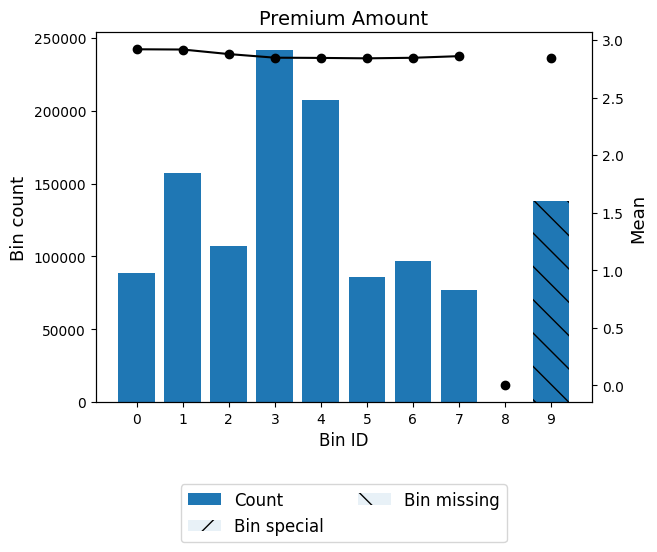

In [62]:
binning.binning_table.plot()


In [ ]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import ShuffleSplit
from datetime import datetime
import numpy as np

# Define objective function
def objective(trial):
    param_grid = {
        'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
        'objective': 'regression',  # Use 'binary' for classification
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.02, 0.1),  # Fine-tuned range
        'num_leaves': trial.suggest_int('num_leaves', 1, 50),  # Wider range for more exploration
        'max_depth': trial.suggest_int('max_depth', -1, 50),  # Allow deeper trees or unlimited depth (-1)
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 0.8),  # Sampling fraction of features
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.85, 1.0),  # Sampling fraction of data
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),  # Frequency of bagging
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),  # Minimum samples per leaf
        'min_split_gain': trial.suggest_loguniform('min_split_gain', 1e-3, 0.1),  # Minimum gain for a split
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),  # Minimum weight for children
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-3, 10),  # L1 regularization
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-3, 10),  # L2 regularization
        'cat_smooth': trial.suggest_uniform('cat_smooth', 5, 30),  # Smoothing for categorical features
        'max_bin': trial.suggest_int('max_bin', 150, 200),  # Granularity of feature splits
        'verbose': -1,  # Suppress output
        'random_state': 41,  # Reproducibility
    }
    print(param_grid)
    
    # Define a 60-40 split
    splitter = ShuffleSplit(n_splits=5, test_size=0.4, random_state=1)


    results = []
    for train_idx, val_idx in splitter.split(X_train_fixed):
        # Prepare data for LightGBM
        X_train_fold, X_val_fold = X_train_fixed.iloc[train_idx], X_train_fixed.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        train_data_lgbm = lgb.Dataset(X_train_fold, label=y_train_fold)
        val_data_lgbm = lgb.Dataset(X_val_fold, label=y_val_fold)
        
        # Train model
        model = lgb.train(
            param_grid,
            train_data_lgbm,
            num_boost_round=500,
            valid_sets=[train_data_lgbm, val_data_lgbm],
            valid_names=["train", "validation"],
            feval=rmsle_metric,    # Custom RMSLE metric
            callbacks=[
                lgb.early_stopping(stopping_rounds=10),
                lgb.log_evaluation(period=5),  # Optional: Logs evaluation every 10 rounds
            ]
        )
        results.append(model.best_score['validation']['rmsle'])
        
    # Use validation score
    return np.mean(results)